Link : https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
data = pd.read_csv('bank.csv')

In [3]:
data.head()

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"30;""unemployed"";""married"";""primary"";""no"";1787;..."
1,"33;""services"";""married"";""secondary"";""no"";4789;..."
2,"35;""management"";""single"";""tertiary"";""no"";1350;..."
3,"30;""management"";""married"";""tertiary"";""no"";1476..."
4,"59;""blue-collar"";""married"";""secondary"";""no"";0;..."


In [4]:
data = pd.read_csv('bank.csv', delimiter=';')

In [5]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [6]:
# Check the Descriptive Statistics for Numerical Columns 
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


We can Identify Balance, duration and Pdays has Outliers as mean and median are differing by large extent just by Observation

In [10]:
# Check Missing Values in Each column in the Dataset

print(data.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [11]:
# Check Overall Missing Values in the Dataset

print(data.isnull().sum().sum())

0


In [12]:
# Check the Datatype for Each Columns

data.dtypes.sort_values()

age           int64
previous      int64
pdays         int64
campaign      int64
duration      int64
balance       int64
day           int64
month        object
contact      object
loan         object
housing      object
default      object
education    object
marital      object
job          object
poutcome     object
y            object
dtype: object

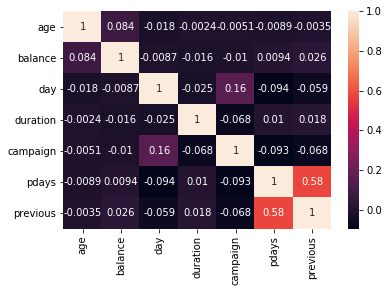

In [13]:
#Pearson’s Correlations, which measures the strength of a linear relationship
sns.heatmap(data.corr(method='pearson'), annot=True)

In [19]:
# Check the Crosstab

pd.crosstab(data.job, data.y)

y,no,yes
job,,
admin.,420,58
blue-collar,877,69
entrepreneur,153,15
housemaid,98,14
management,838,131
retired,176,54
self-employed,163,20
services,379,38
student,65,19


## Generated Hypothesis

1. If duration &lt; 20 Secs, Term Deposit = &quot;No&quot;
2. If job = “unemployed” , Term Deposit = &quot;No&quot;
3. If marital = “married” , Term Deposit = &quot;Yes&quot;
4. If default = “yes” , Term Deposit = &quot;No&quot;
5. If campaign &gt;=5 , Term Deposit = &quot;Yes&quot;
6. If job = “unemployed” , Term Deposit = &quot;No&quot;
7. If age between 30 and 60 , Term Deposit = &quot;Yes&quot;
8. If job = “blue-collar” , Term Deposit = &quot;Yes&quot;
9. If pdays &gt; 365 days , Term Deposit = &quot;No&quot;
10. If education = “basic.4y” or “basic.6y” or “basic.9y” =&gt; Primary, Scondary or Tertiary ,
Term Deposit = &quot;Yes&quot;
11. If pdays &gt; 250 days , Term Deposit = &quot;No&quot;
12. If poutcome = “success” , Term Deposit = &quot;Yes&quot;
13. If housing = “no” and marital = “marital” , Term Deposit = &quot;Yes&quot;
14. If job = “entrepreneur” , Term Deposit = &quot;Yes&quot;
15. If default = “yes” and age &lt; 25 and marital =”single”, Term Deposit = &quot;No&quot;

In [17]:
# If duration < 20 Secs, Term Deposit = "No"

pd.crosstab(data.y, data.duration <20)
# We Proved our Hypothesis

duration,False,True
y,,
no,3882,118
yes,521,0


In [20]:
# If job = “unemployed” , Term Deposit = "No"
pd.crosstab(data.y, data.job == "unemployed")
# We Proved our Hypothesis

job,False,True
y,,
no,3885,115
yes,508,13


In [21]:
# If marital = “married” , Term Deposit = "Yes"

pd.crosstab(data.y, data.marital == "married")
# We identified an Alternate Hypothesis

marital,False,True
y,,
no,1480,2520
yes,244,277


In [22]:
# If default = “yes” , Term Deposit = No

pd.crosstab(data.y, data.default == "yes")
# We Proved our Hypothesis

default,False,True
y,,
no,3933,67
yes,512,9


In [25]:
# If campaign >=5 , Term Deposit = "Yes"

pd.crosstab(data.y, data.campaign >= 5)
# We identified an Alternate Hypothesis

campaign,False,True
y,,
no,3403,597
yes,478,43


In [44]:
# If age between 30 and 60 , Term Deposit = "Yes"

pd.crosstab(data.y, (data.age >= 30) & (data.age < 60))
# We identified an Alternate Hypothesis

age,False,True
y,,
no,527,3473
yes,129,392


In [45]:
# If job = “blue-collar” , Term Deposit = "Yes"

pd.crosstab(data.y, data.job == "blue-collar")
# We identified an Alternate Hypothesis

job,False,True
y,,
no,3123,877
yes,452,69


In [46]:
# If pdays > 365 days , Term Deposit = "No"

pd.crosstab(data.y, data.pdays > 365)
# We Proved our Hypothesis

pdays,False,True
y,,
no,3952,48
yes,503,18


In [47]:
# If education = “basic.4y” or “basic.6y” or “basic.9y” => Primary, Scondary or Tertiary , Term Deposit = "Yes"

pd.crosstab(data.y, data.education)
# We Proved our Hypothesis

education,primary,secondary,tertiary,unknown
y,,,,
no,614,2061,1157,168
yes,64,245,193,19


In [48]:
# If poutcome = “success” , Term Deposit = "Yes"

pd.crosstab(data.y, data.poutcome == "success")
# We Proved our Hypothesis

poutcome,False,True
y,,
no,3954,46
yes,438,83


In [50]:
# If housing = “no” and marital = “marital” , Term Deposit = "Yes"

pd.crosstab(data.y, (data.housing == "no") & (data.marital == "married"))
# We identified an Alternate Hypothesis

col_0,False,True
y,,
no,2983,1017
yes,366,155


In [56]:
# If job = “entrepreneur” , Term Deposit = "Yes"

pd.crosstab(data.y, data.job == "entrepreneur", margins=True)
# We Proved an Alternate Hypothesis

job,False,True,All
y,,,
no,3847,153,4000
yes,506,15,521
All,4353,168,4521


In [53]:
# If default = “yes” and age < 25 and marital =”single”, Term Deposit = "No"

pd.crosstab(data.y, (data.default == "yes") & (data.marital == "single") & (data.age < 25))
# We identified an Alternate Hypothesis as No Combination of the above mentioned type is available

col_0,False
y,
no,4000
yes,521
